<strong><center>**Predicción de sufrir un ataque cerebro vascular usando árboles de decisión**</center></strong>
***

**[Consigna](https://docs.google.com/document/d/1qvdD2FlI9xbU64m6cDjngZfINylKCJXYpyfxB9i7-Tc/edit?usp=sharing)**

* El objetivo de este trabajo práctico es analizar las particularidades de la utilización de algoritmos para la generación de árboles de decisión por medio de su aplicación en casos casi reales. El mismo pretende fijar conceptos estudiados en la teoría: sobreajuste y poda; tratamiento de datos faltantes; tolerancia al ruido; discretización de atributos numéricos. El material básico para la elaboración del presente trabajo se encuentra en las teóricas y prácticas presentadas hasta el momento y en las próximas clases y en la bibliografía indicada (por ej. libro de Mitchell). Podrá utilizarse cualquier otra fuente siempre que esté correctamente referenciada. 

* El presente trabajo será grupal. El grupo deberá estar compuesto por exactamente tres integrantes. Preferentemente uno de ellos debe saber programar. Se podrán evaluar contenidos del Trabajo Práctico durante el parcial posterior a la entrega del TP. Todos los integrantes deben tener conocimiento del desarrollo del TP.
* La fecha límite de entrega es el 30 de mayo a las 23:59 hs.
Para el desarrollo del trabajo se utilizará un conjunto de datos que proveerá la cátedra (healthcare-dataset-stroke-data.csv) con el objetivo de predecir qué paciente va a sufrir un accidente cerebrovascular. Para resolver este problema se utilizarán árboles de decisión. 
* Se deberá elaborar un informe preferentemente en LaTeX y entregarlo en formato .pdf. La entrega deberá estar acompañada de la Jupyter Notebook en Python utilizada para generar los resultados. El documento a entregar debe cumplir con los siguientes requisitos: 
debe tener no más que cuatro hojas, con fuente tamaño 10 e interlineado simple. * La bibliografía no cuenta en la cantidad de hojas.
una carátula en donde figuren universidad, nombre de maestría, materia, número de grupo, nombres de los integrantes del grupo, número de TP, año de cursada, etc. La carátula no cuenta en la cantidad de hojas. 
un resumen (del estilo de un artículo científico de no más de 200 palabras)
una introducción en donde, entre otros, conste el objetivo del trabajo y una explicación de cómo está organizado el resto del documento.
una sección de datos, en donde se describan los datos utilizados y sus particularidades
una sección de metodología, en donde se describan las metodologías utilizadas (sobre datos y sobre algoritmos)
una sección resultados, que incluya los resultados y su análisis
una sección de conclusiones. Por tratarse de un trabajo de investigación netamente práctico, las conclusiones deben ser la resultante de la elaboración de las pruebas realizadas. La información obtenida de referencias externas puede y debe ser tomada como insumo, pero no como conclusión.
referencias bibliográficas (referenciadas a lo largo del trabajo)
* El informe se deberá publicar en el aula virtual de la materia por uno sólo de los integrantes del grupo.
* Para realizar el informe se deberán considerarse y documentarse los siguientes puntos:
***



**TBD:**


1.   Haremos el informe en Latex? Sí!!
2.   Estrategia a utilizar para enfrentar el desbalanceo



**TODOs:**

1.   Investigar qué significan los decimales en la variable de edad?
2.   


---


Cargamos la librería a usar

In [1]:
# libreria para hacer DEA
# !pip install sweetviz 

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sweetviz as sv

In [4]:
# df_strokes = pd.read_csv('https://raw.githubusercontent.com/blukitas/AA-2021/main/TPs/01.TP/healthcare-dataset-stroke-data.csv')
# df_original = pd.read_csv('https://raw.githubusercontent.com/blukitas/AA-2021/main/TPs/01.TP/healthcare-dataset-stroke-data.csv')
df_strokes = pd.read_csv('./healthcare-dataset-stroke-data.csv')
df_original = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [5]:
df_strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Desarrollo:
---
**texto en negrita**
a) A partir de los datos entregados, describir los atributos realizando una breve explicación de qué representan y del tipo de variable (categórica, numérica u ordinal). En caso de que haya variables no numéricas, reportar los posibles valores que toman y cuán frecuentemente lo hacen.  

## Descriptivo de variables

In [6]:
analize_report = sv.analyze(df_strokes)
analize_report.show_html('analize.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analize.html was generated.



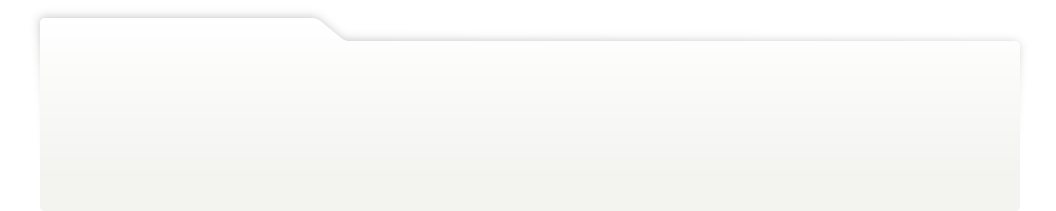
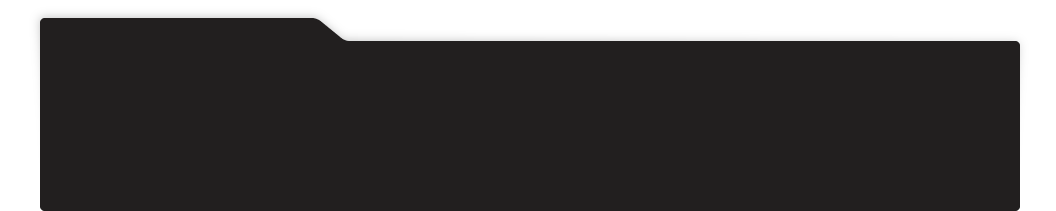
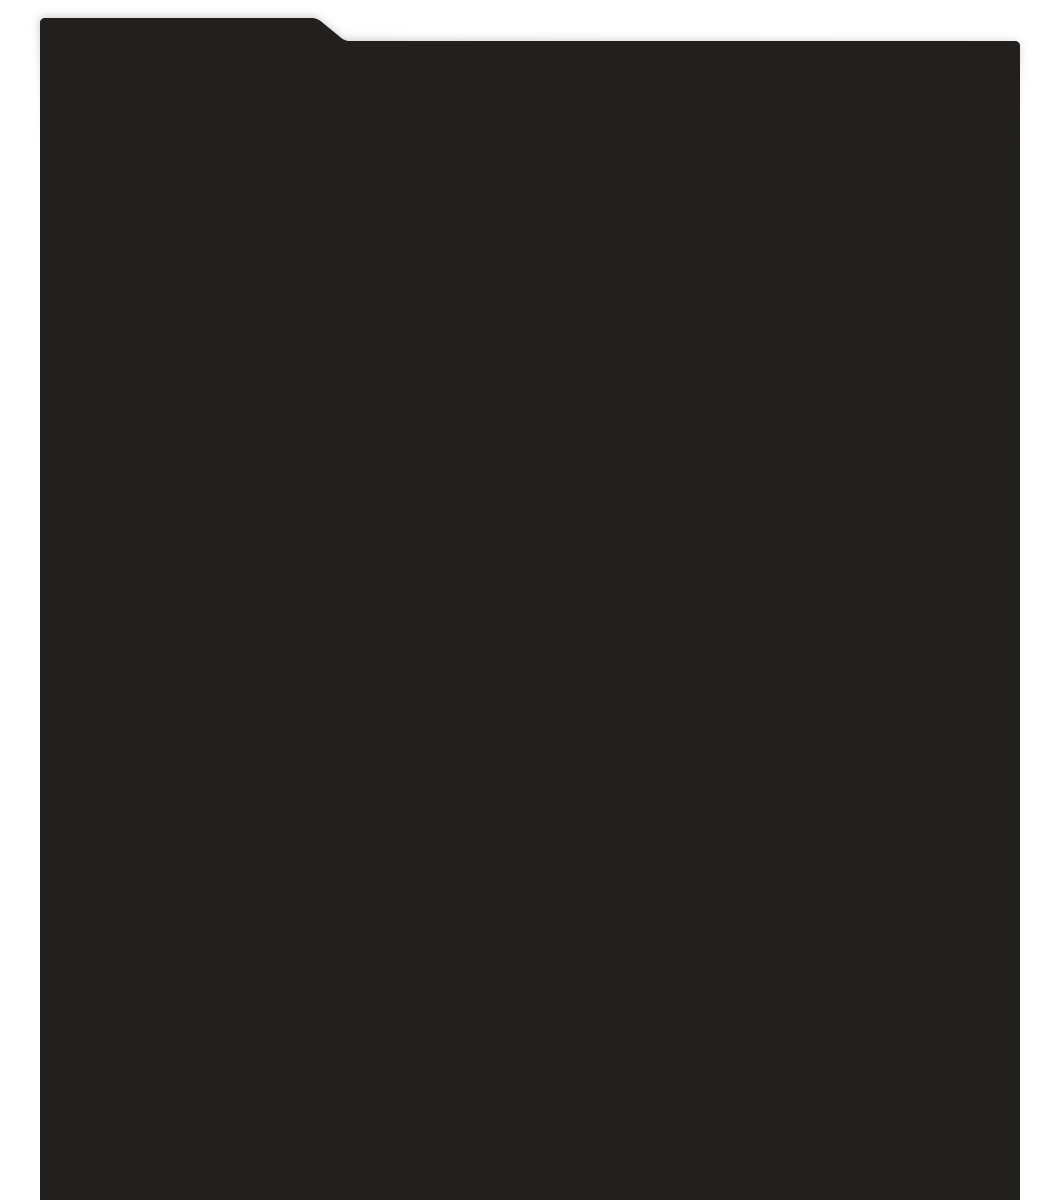
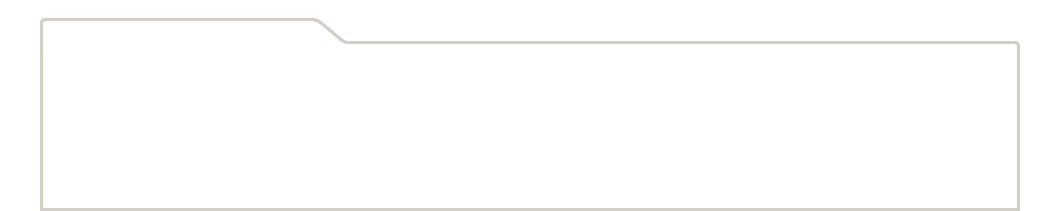
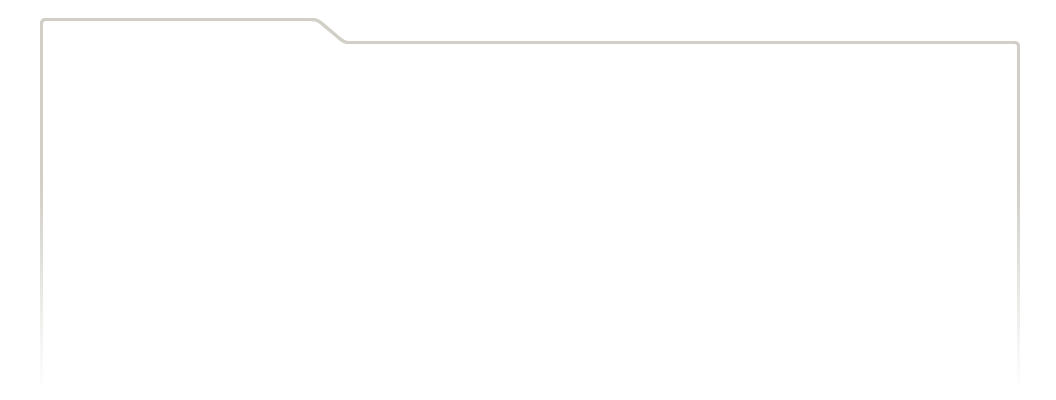
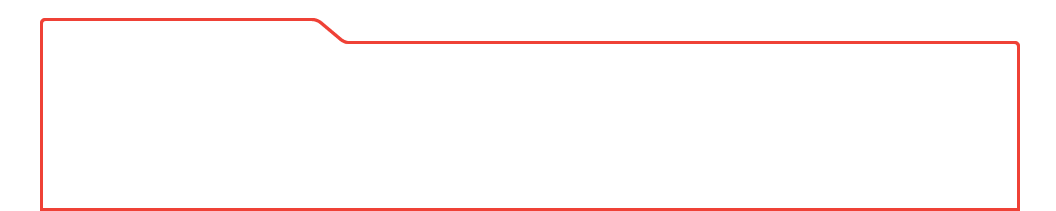
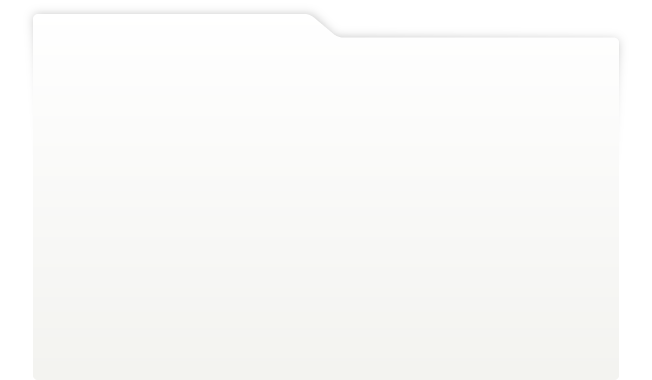
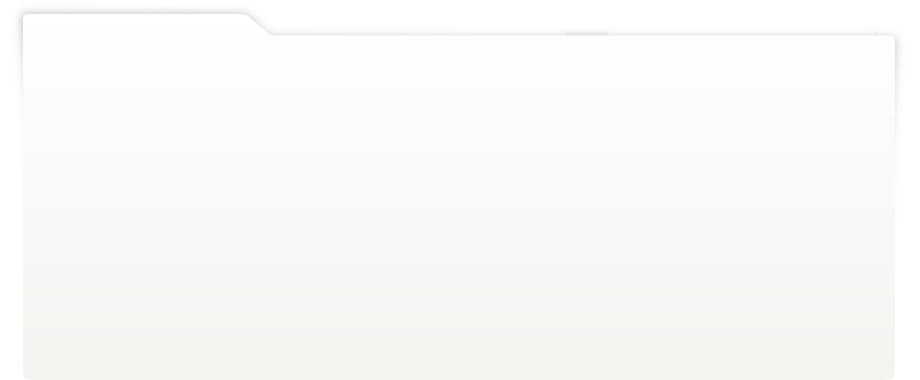
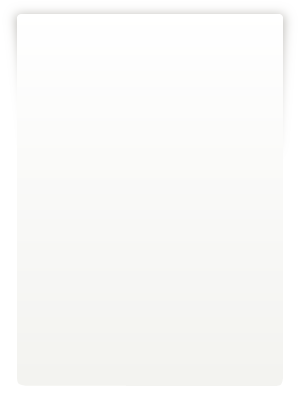
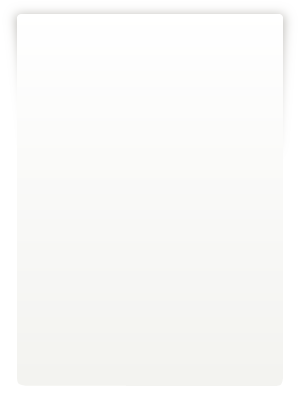
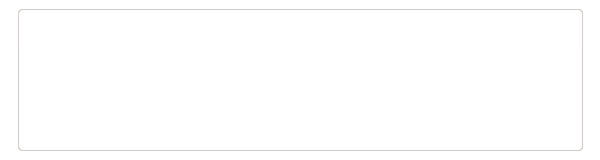
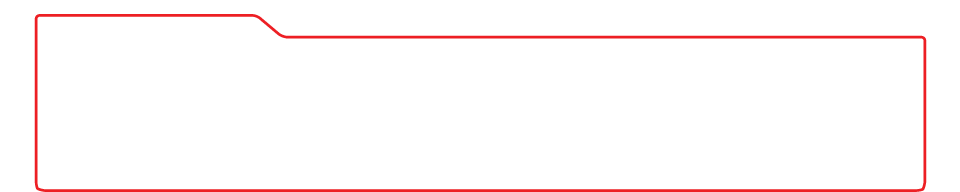
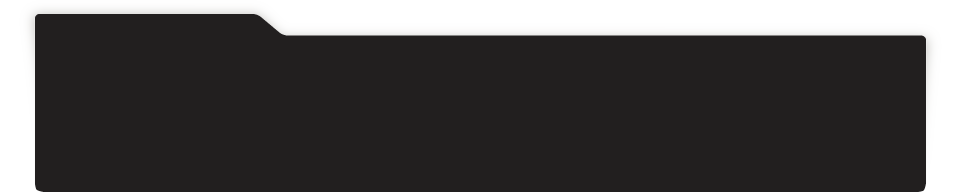
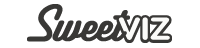
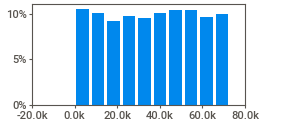
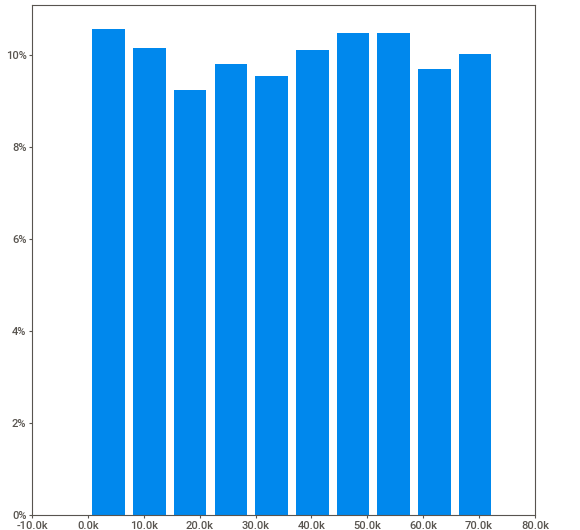
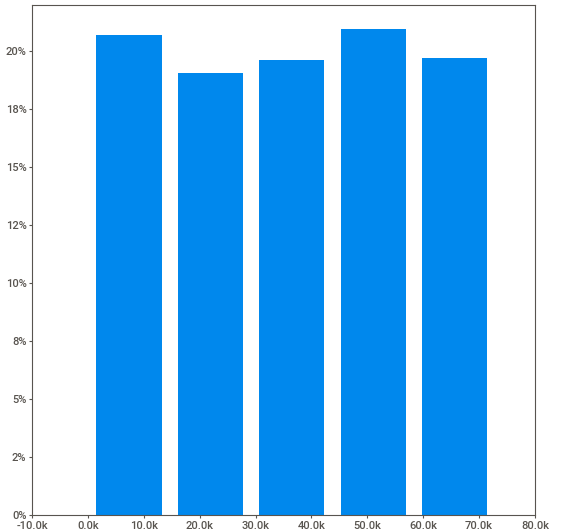
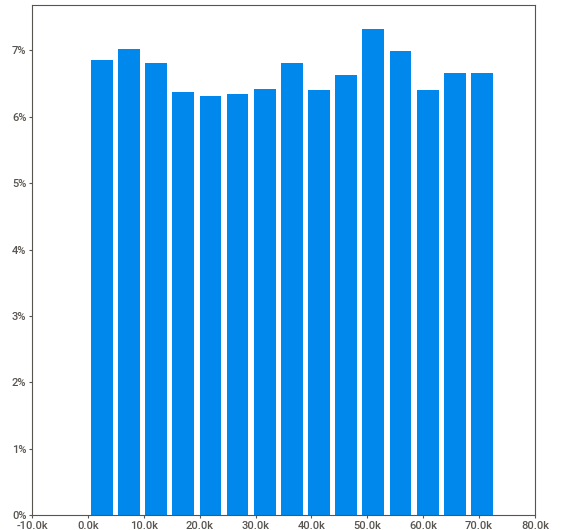
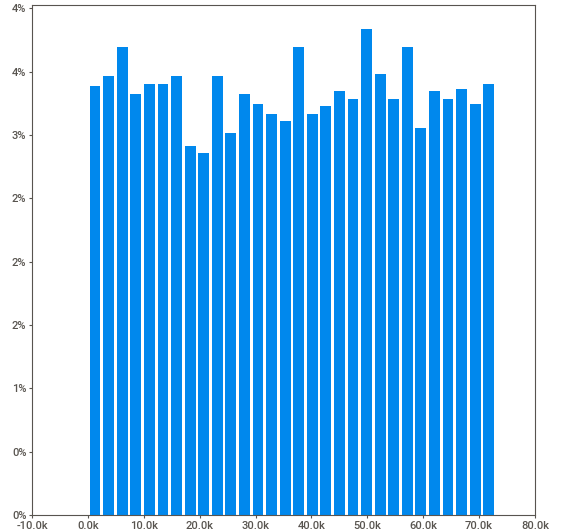
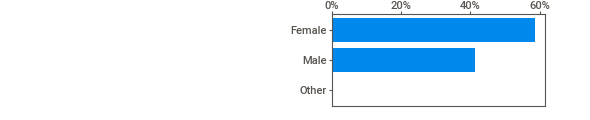
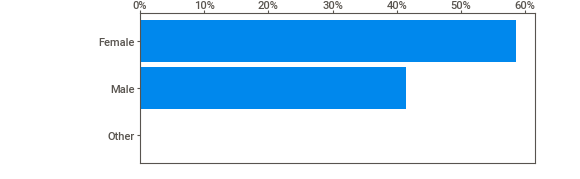
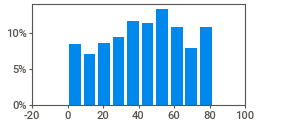
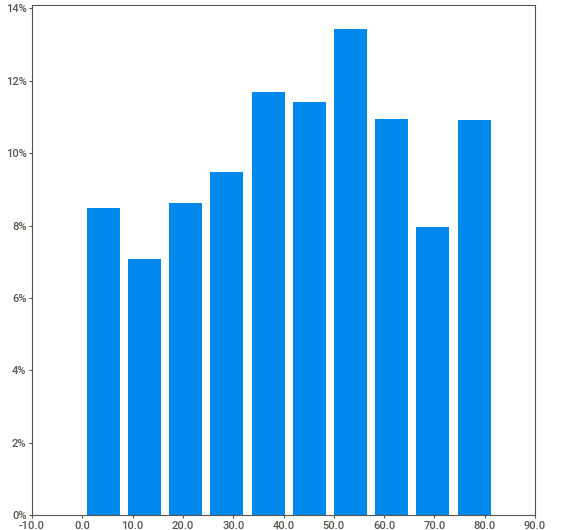
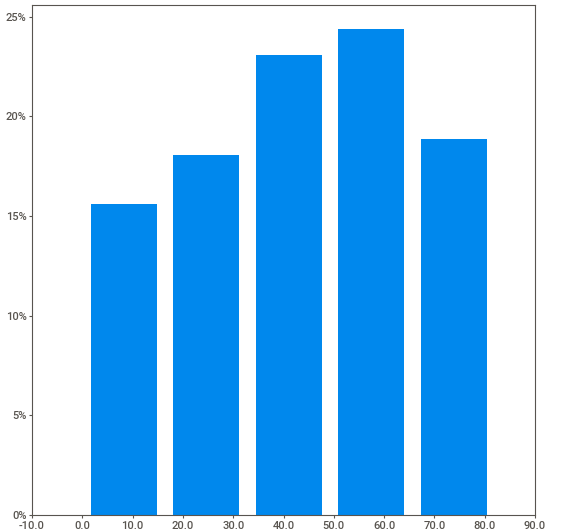
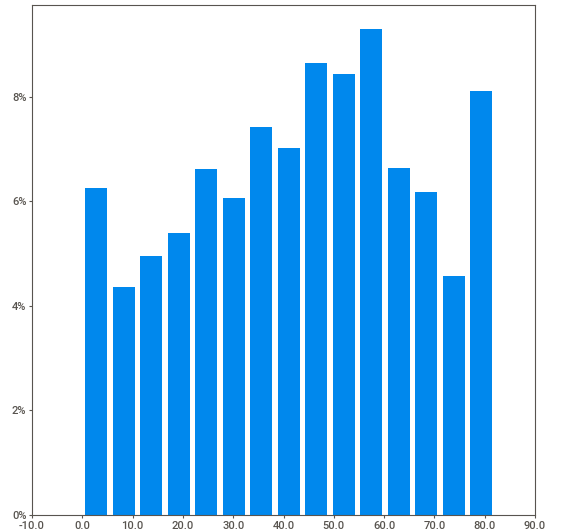
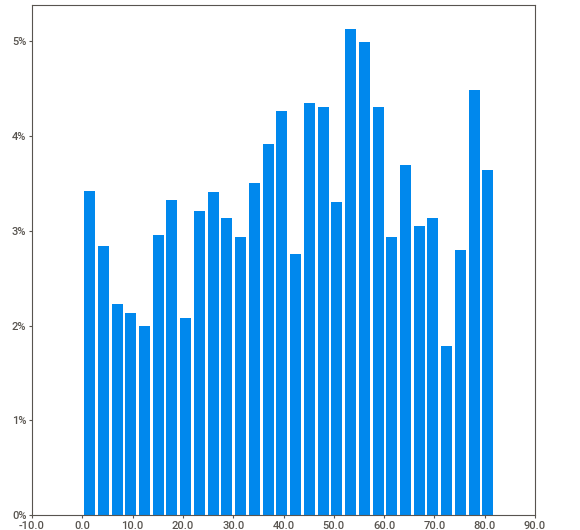
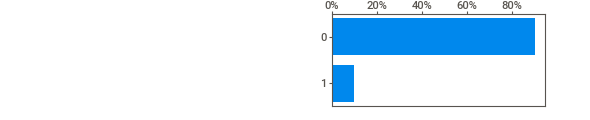
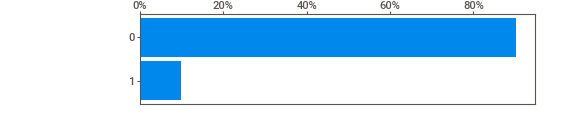
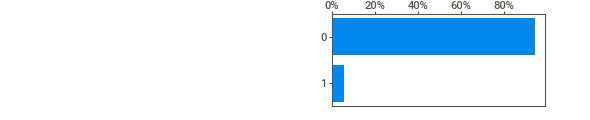
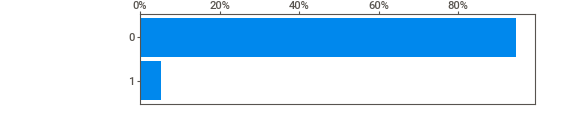
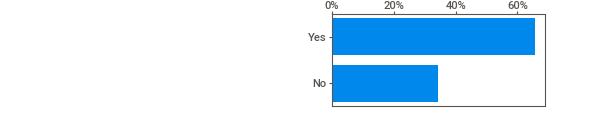
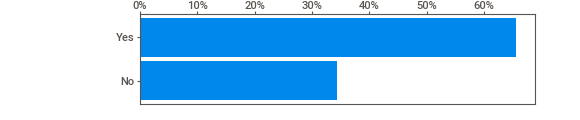
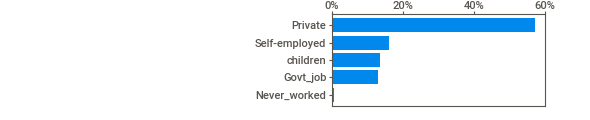
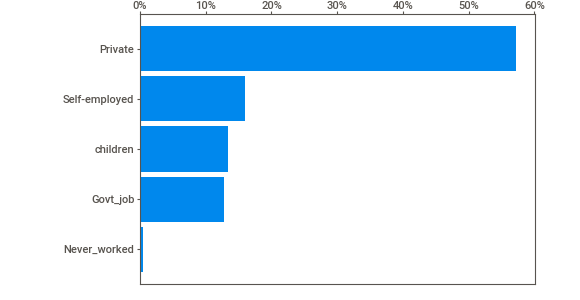
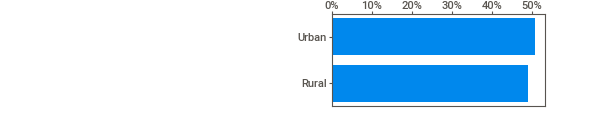
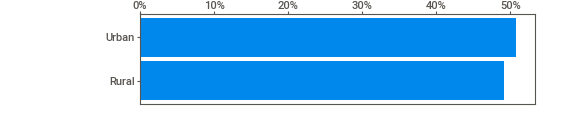
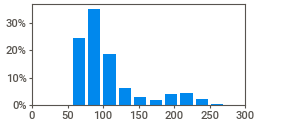
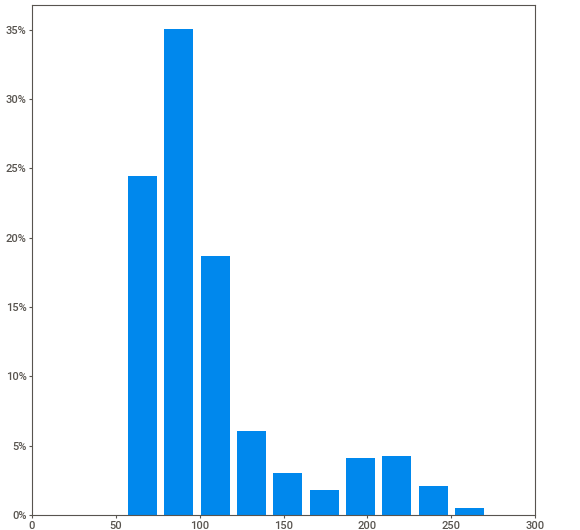
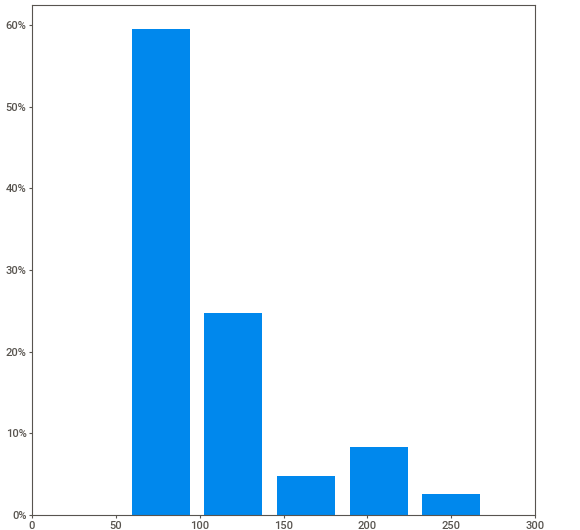
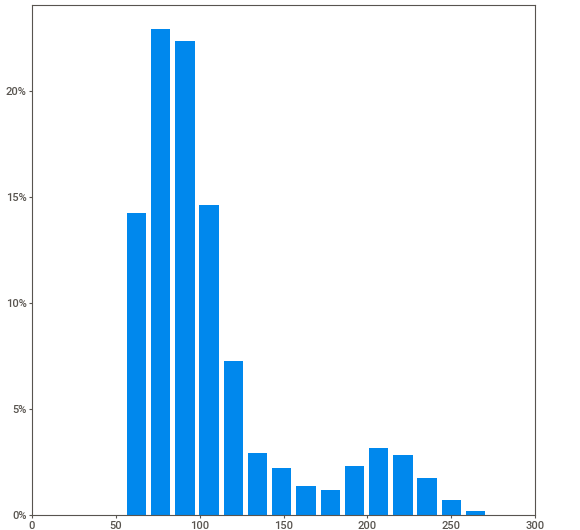
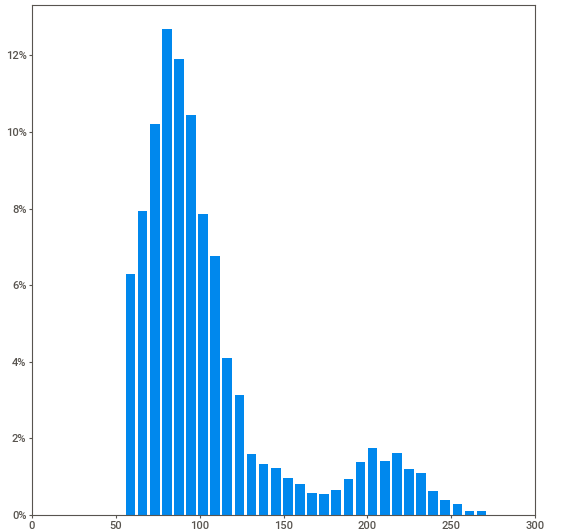
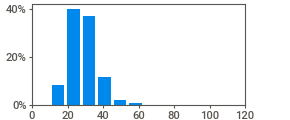
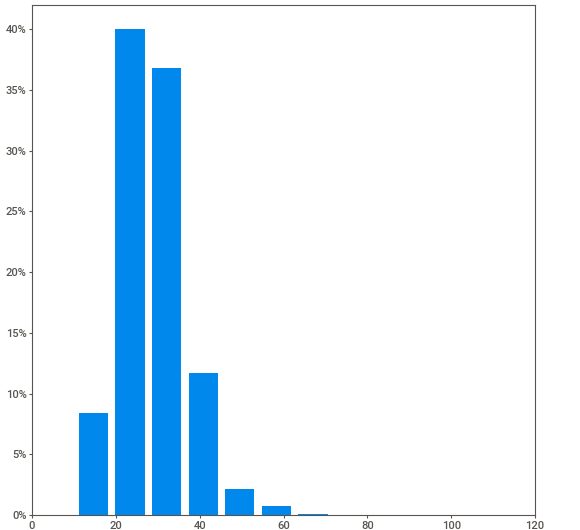
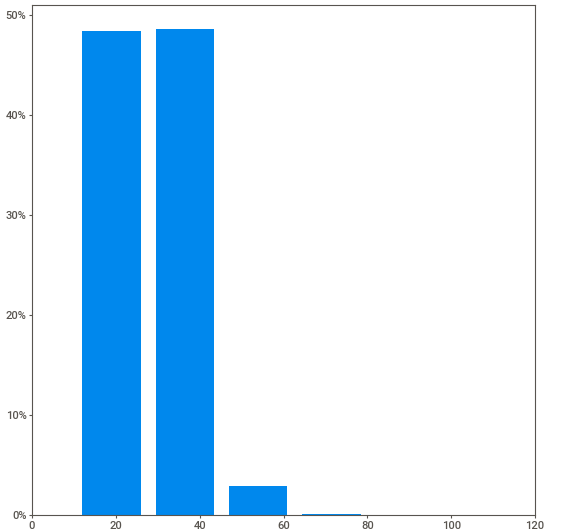
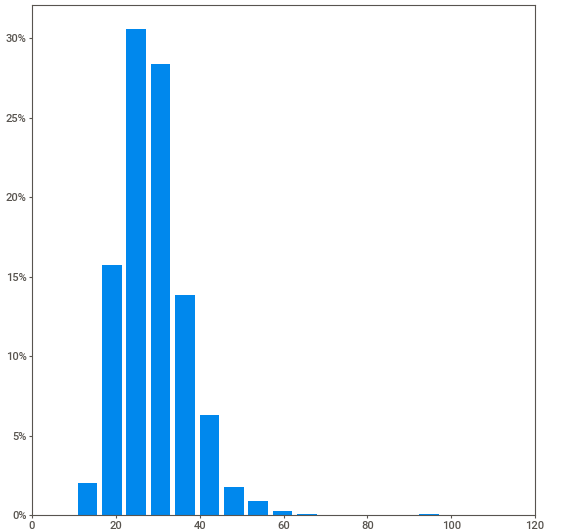
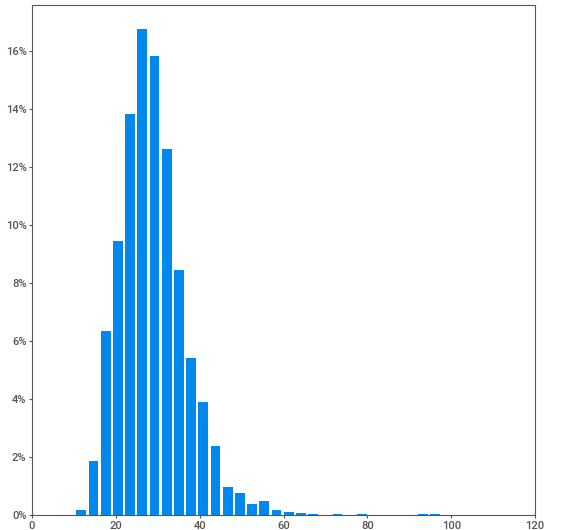
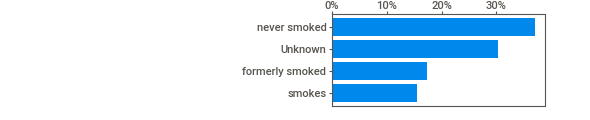
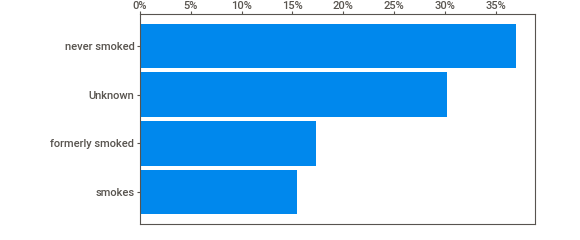
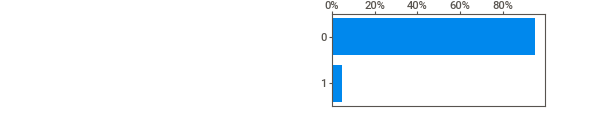
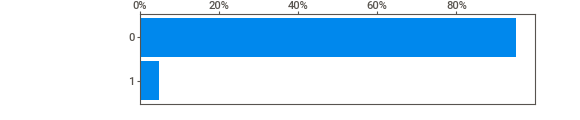
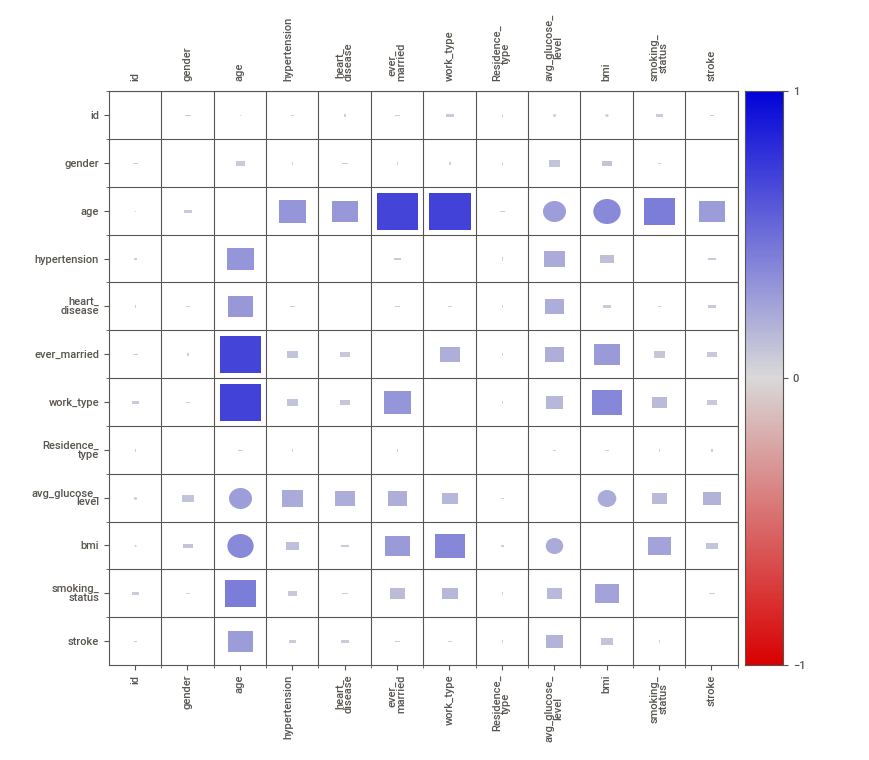
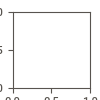

In [7]:
import IPython
IPython.display.HTML('analize.html')

| Atributo      | Descripción | Tipo|
| ----------- | ----------- |----------- |
| id      | Identificador       | ? |
| gender   | Género        | Categórica |
| age   | Edad        |Numérica |
| hypertension   | Indicador de presencia de hipertensión        | Categórica |
| heart_disease   | Indicador de presencia de enfermedad cardíaca        | Categórica |
| ever_married   | Indica si el sujeto alguna vez estuvo casado         |Categórica |
| work_type   | Tipo de trabajo        |Categórica |
| Residence_type   | Tipo de residencia        | Categórica |
| avg_glucose_level   | Nivel promedio de la glucosa en sangre        | Numérica |
| bmi   | [Body Mass Index (Índice de masa corporal)](https://www.cdc.gov/healthyweight/assessing/bmi/index.html#:~:text=Body%20Mass%20Index%20(BMI)%20is,or%20health%20of%20an%20individual.)|Numérica |
| smoking_status   |  [Tipo de fumador o no❓❓](https://www.cdc.gov/nchs/nhis/tobacco/tobacco_glossary.htm)     |Categórica |
| stroke   | Indicador de si alguna vez ha sufrido algún accidente cerebrovascular        |Categórica |

### Categoricos

In [8]:
for i in ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']:
    print(f'Variable: {i}')
    df_strokes[i].value_counts()
    print(f'Cantidad de valores que toma: {df_strokes[i].value_counts().count()}')
    df_strokes[i] = df_strokes[i].astype("category")

Variable: gender
Cantidad de valores que toma: 3
Variable: hypertension
Cantidad de valores que toma: 2
Variable: heart_disease
Cantidad de valores que toma: 2
Variable: ever_married
Cantidad de valores que toma: 2
Variable: work_type
Cantidad de valores que toma: 5
Variable: Residence_type
Cantidad de valores que toma: 2
Variable: smoking_status
Cantidad de valores que toma: 4
Variable: stroke
Cantidad de valores que toma: 2


In [9]:
df_strokes['gender'].value_counts(normalize=True)
# Armar una tablita en el informe con esta distribucion de valores (Para las categoricas)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

In [10]:
df_strokes.dtypes

id                      int64
gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object

### Edad

Validacion de edad
TBD: Consultar en el mail

In [11]:
df_strokes[df_strokes.work_type == 'children'].sort_values('age', ascending=False)
# df_strokes[df_strokes.age < 1].work_type.value_counts()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3357,32717,Male,16.00,0,0,No,children,Rural,106.11,22.4,Unknown,0
1455,72132,Male,16.00,0,0,No,children,Urban,102.30,21.9,Unknown,0
4604,46691,Male,16.00,0,0,No,children,Urban,140.10,38.7,never smoked,0
921,32554,Female,16.00,0,0,No,children,Rural,109.02,19.8,Unknown,0
3719,49095,Female,16.00,0,0,No,children,Urban,64.51,21.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [12]:
df_strokes[df_strokes.age < 1].work_type.value_counts()
# df_strokes[df_strokes.age < 12].work_type.value_counts()

children         43
Self-employed     0
Private           0
Never_worked      0
Govt_job          0
Name: work_type, dtype: int64

In [13]:
df_strokes[np.logical_and((df_strokes.smoking_status == 'Unknown'), (df_strokes.age < 1))].work_type.value_counts()

children         43
Self-employed     0
Private           0
Never_worked      0
Govt_job          0
Name: work_type, dtype: int64

In [14]:
df_strokes[df_strokes.age < 1]
# TBD: A los menores de 1 año, ponerle el promedio de la edad de los work_type == 'Children' y poner como Smoking_status = 'never_smoked'

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,54747,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,66772,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,68908,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,30084,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,40544,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [15]:
df_strokes[(df_strokes.work_type == 'children')].smoking_status.value_counts()
# TODO Correlacion entre children y smoking_status

Unknown            618
never smoked        54
formerly smoked     13
smokes               2
Name: smoking_status, dtype: int64

In [16]:
df_strokes[np.logical_and((df_strokes.work_type == 'children'), (df_strokes.smoking_status == 'smokes'))]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1512,4833,Female,12.0,0,0,No,children,Rural,207.45,25.4,smokes,0
2013,64128,Male,10.0,0,0,No,children,Urban,63.08,20.5,smokes,0


In [17]:
df_strokes[np.logical_and((df_strokes.work_type == 'children'), (df_strokes.age < 10))].smoking_status.value_counts()
# TODO unknow como nunca fumaron

Unknown            470
smokes               0
never smoked         0
formerly smoked      0
Name: smoking_status, dtype: int64

In [18]:
df_strokes[df_strokes.age < 10].smoking_status.value_counts()
# TODO unknow como nunca fumaron

Unknown            472
smokes               0
never smoked         0
formerly smoked      0
Name: smoking_status, dtype: int64

In [19]:
df_strokes[df_strokes.age < 14].work_type.value_counts()
# TODO: como children

children         630
Private           10
Never_worked       3
Self-employed      2
Govt_job           0
Name: work_type, dtype: int64

In [20]:
df_strokes[np.logical_and((df_strokes.work_type == 'Never_worked'), (df_strokes.age < 14))]
# TODO: Mal taggeado

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
939,16556,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
1789,13862,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
4410,34900,Male,13.0,0,0,No,Never_worked,Urban,85.08,14.6,Unknown,0


## Datos faltantes

---
b) Reportar si hay valores faltantes. ¿Cuántos son y en qué atributos se encuentran? En caso de haberlos, ¿es necesario y posible asignarles un valor?  
***


### BMI

Los datos faltantes están en: 
* bmi
* smoking_status	 ('Unknown')

? Para hombre, la correlacion edad-bmi es de .42 (Para mujeres .28 y en general .3). 
? Podemos estimar o tomar alguna decisión con 'Unknown'.

In [21]:
df_strokes['bmi_inputation_mean'] = df_strokes['bmi']
df_strokes['bmi_inputation_knn'] = df_strokes['bmi']
df_strokes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_inputation_mean,bmi_inputation_knn
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.6,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.5,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.4,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,NaN,NaN
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,40.0,40.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,30.6,30.6
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,25.6,25.6


Imputacion:
- BMI
  - Media general
  - Por la media segmentada
  - KNN
  - H2O para manejo de variables categóricas y missing values. (**TBD**, ver este tema desde el notebook)

**TBD**: Realizarla 'modelo' sobre el trai, ajustar despues con el 'modelo' entrenado sobre test.  
**TBD**: 
Unknown
- Si children < 10 => never_smoke
- Sino imputaciones
  

### Imputacion BMI

Correlaciones entre variables numericas y bmi

<AxesSubplot:>

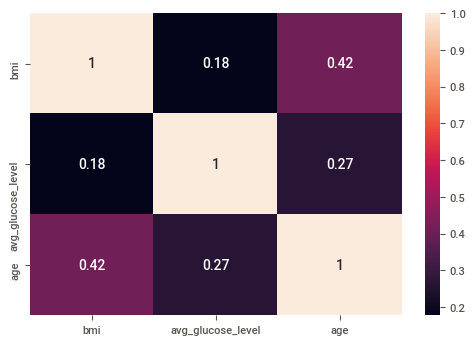

In [22]:
# correlaciones = np.corrcoef(df_strokes[['bmi', 'avg_glucose_level', 'age']])
df_hombres = df_strokes[df_strokes.gender=='Male']
sns.heatmap(data=df_hombres[['bmi', 'avg_glucose_level', 'age']].corr(), annot=True)
# df_strokes[['bmi', 'avg_glucose_level', 'age']]

In [23]:
df_strokes[df_strokes.bmi > 60]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_inputation_mean,bmi_inputation_knn
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,60.9,60.9
358,66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0,64.8,64.8
466,1307,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0,60.2,60.2
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0,71.9,71.9
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0,78.0,78.0
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0,66.8,66.8
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0,97.6,97.6
2764,20292,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0,63.3,63.3
2840,65895,Female,52.0,0,0,Yes,Private,Urban,98.27,61.2,Unknown,0,61.2,61.2
3825,72784,Female,52.0,0,0,Yes,Private,Rural,118.46,61.6,smokes,0,61.6,61.6


In [24]:
df_strokes.bmi.mean()

28.893236911794666

In [25]:
df_strokes.bmi_inputation_mean = df_strokes.bmi_inputation_mean.fillna(value=df_strokes.bmi.mean())
df_strokes[df_strokes.bmi.isna()] 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_inputation_mean,bmi_inputation_knn
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,28.893237,NaN
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,28.893237,NaN
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1,28.893237,NaN
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1,28.893237,NaN
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1,28.893237,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0,28.893237,NaN
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0,28.893237,NaN
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0,28.893237,NaN
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0,28.893237,NaN


In [26]:
df_strokes['bmi_inputation_work_type'] = df_strokes.bmi
for tipo in df_strokes.work_type.unique().to_list():
  df_strokes.loc[(df_strokes.work_type == tipo), "bmi_inputation_work_type"] = df_strokes[df_strokes['work_type'] == tipo].bmi_inputation_work_type.fillna(value=df_strokes[df_strokes['work_type'] == tipo].bmi.mean())


In [27]:
# Encodings
df_strokes['ever_married_cat'] = df_strokes['ever_married'].cat.codes
df_strokes['residence_type_cat'] = df_strokes['Residence_type'].cat.codes
# Ref: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df_strokes[['gender']]).toarray(), columns=enc.get_feature_names(['gender']))
# merge with main df bridge_df on key values
df_strokes = df_strokes.join(enc_df)
enc_df = pd.DataFrame(enc.fit_transform(df_strokes[['work_type']]).toarray(), columns=enc.get_feature_names(['work_type']))
# merge with main df bridge_df on key values
df_strokes = df_strokes.join(enc_df)
enc_df = pd.DataFrame(enc.fit_transform(df_strokes[['smoking_status']]).toarray(), columns=enc.get_feature_names(['smoking_status']))
# merge with main df bridge_df on key values
df_strokes = df_strokes.join(enc_df)

In [28]:
df_strokes.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_inputation_mean', 'bmi_inputation_knn',
       'bmi_inputation_work_type', 'ever_married_cat', 'residence_type_cat',
       'gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [29]:
df_strokes.rename(columns={'smoking_status_never smoked': 'smoking_status_never_smoked', 'smoking_status_formerly smoked': 'smoking_status_formerly_smoked'}, inplace=True)


In [30]:
df_strokes[['age','hypertension','heart_disease','avg_glucose_level','bmi','ever_married_cat', 'residence_type_cat','gender_Female','gender_Male','gender_Other', 'work_type_Govt_job','work_type_Never_worked','work_type_Private', 'work_type_Self-employed','work_type_children', 'smoking_status_Unknown','smoking_status_formerly_smoked', 'smoking_status_never_smoked','smoking_status_smokes','stroke']]

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_cat,residence_type_cat,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,61.0,0,0,202.21,NaN,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,80.0,0,1,105.92,32.5,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,49.0,0,0,171.23,34.4,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,79.0,1,0,174.12,24.0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5106,81.0,0,0,125.20,40.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
5107,35.0,0,0,82.99,30.6,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
5108,51.0,0,0,166.29,25.6,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [31]:
from fancyimpute import KNN
knn_imputer = KNN()
df_strokes_knn = df_strokes[['age','hypertension','heart_disease','avg_glucose_level','bmi','ever_married_cat', 'residence_type_cat','gender_Female','gender_Male','gender_Other', 'work_type_Govt_job','work_type_Never_worked','work_type_Private', 'work_type_Self-employed','work_type_children', 'smoking_status_Unknown','smoking_status_formerly_smoked', 'smoking_status_never_smoked','smoking_status_smokes','stroke']].copy(deep=True)
df_strokes_knn.iloc[:, :] = knn_imputer.fit_transform(df_strokes_knn)

Imputing row 1/5110 with 0 missing, elapsed time: 4.643
Imputing row 101/5110 with 0 missing, elapsed time: 4.645
Imputing row 201/5110 with 1 missing, elapsed time: 4.646
Imputing row 301/5110 with 0 missing, elapsed time: 4.646
Imputing row 401/5110 with 0 missing, elapsed time: 4.647
Imputing row 501/5110 with 0 missing, elapsed time: 4.647
Imputing row 601/5110 with 0 missing, elapsed time: 4.647
Imputing row 701/5110 with 0 missing, elapsed time: 4.648
Imputing row 801/5110 with 0 missing, elapsed time: 4.648
Imputing row 901/5110 with 0 missing, elapsed time: 4.648
Imputing row 1001/5110 with 0 missing, elapsed time: 4.649
Imputing row 1101/5110 with 0 missing, elapsed time: 4.649
Imputing row 1201/5110 with 0 missing, elapsed time: 4.650
Imputing row 1301/5110 with 1 missing, elapsed time: 4.651
Imputing row 1401/5110 with 0 missing, elapsed time: 4.651
Imputing row 1501/5110 with 0 missing, elapsed time: 4.652
Imputing row 1601/5110 with 0 missing, elapsed time: 4.652
Imputing 

In [32]:
df_strokes_knn[df_strokes.bmi.isna()]

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_cat,residence_type_cat,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,stroke
1,61.0,0.0,0.0,202.21,32.729938,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
8,59.0,0.0,0.0,76.15,24.833122,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13,78.0,0.0,1.0,219.84,29.034735,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19,57.0,0.0,1.0,217.08,32.613799,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27,58.0,0.0,0.0,189.84,32.872165,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,41.0,0.0,0.0,70.15,36.555420,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5048,40.0,0.0,0.0,191.15,29.444062,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5093,45.0,1.0,0.0,95.02,32.700044,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5099,40.0,0.0,0.0,83.94,30.040524,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
df_strokes['bmi_inputation_knn'] = df_strokes_knn.bmi

In [34]:
df_strokes[df_strokes.bmi.isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
df_strokes.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_inputation_mean', 'bmi_inputation_knn',
       'bmi_inputation_work_type', 'ever_married_cat', 'residence_type_cat',
       'gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly_smoked',
       'smoking_status_never_smoked', 'smoking_status_smokes'],
      dtype='object')

<AxesSubplot:>

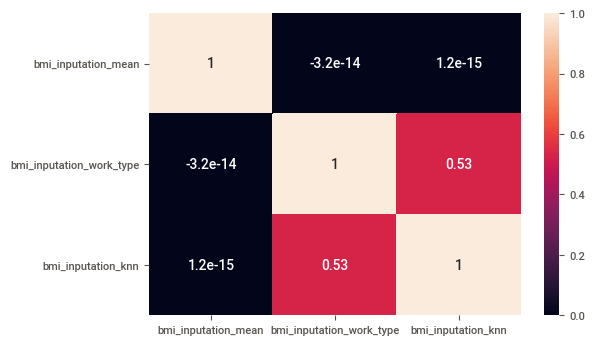

In [36]:
df_corr = df_strokes[df_strokes.bmi.isna()] #[['bmi', 'bmi_inputation_mean', 'bmi_inputation_work_type', 'bmi_inputation_knn']]
sns.heatmap(data=df_corr[['bmi_inputation_mean', 'bmi_inputation_work_type', 'bmi_inputation_knn']].corr(), annot=True)

### Smoking status

Validaciones cruzdas con otros tipos (Working type y edad).

* Llenado por validacion cruzada
* Imputacion:
  * Por media, 
  * Por media por atributo más correlacionado, 
  * Por knn


TBD: Repetir con la categoría de fumadores 'Unknown'

## Correlacion


c) ¿Qué variables se correlacionan más con el evento de lesión (Stroke)? Para las cuatro más correlacionadas, realizar un gráfico en el que se pueda observar la correlación entre la variable y el stroke.   
***

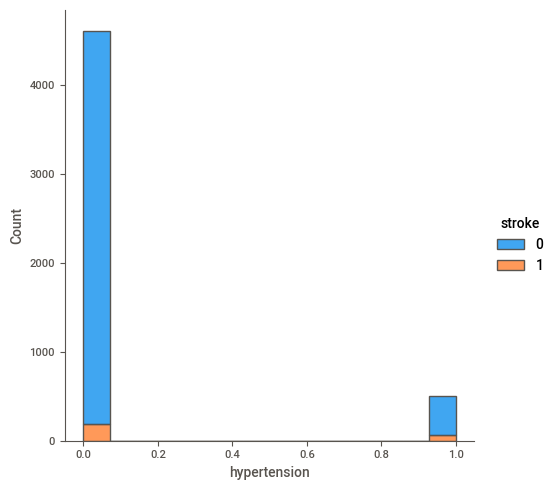

In [37]:
#fig, ax = plt.subplots()
sns.displot(df_original, x='hypertension', hue='stroke', multiple='stack')

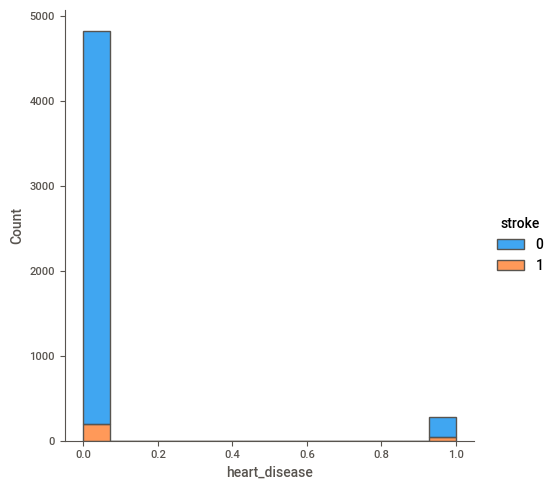

In [38]:

sns.displot(df_original, x='heart_disease', hue='stroke', multiple='stack',common_norm=True)

In [39]:
# table = pd.pivot_table(df_strokes, values='age', index='hypertension', columns='stroke', aggfunc=np.count_nonzero)
# table['success_rate'] = table[1] / (table[1] + table[0])
# table

In [40]:
# pd.crosstab(index=df_strokes ['hypertension'],
            # columns=df_strokes['stroke'], margins=True, normalize=True)

pd.crosstab(index=df_strokes ['hypertension'],
            columns=df_strokes['stroke'], margins=True, normalize='index')

pd.crosstab(index=df_strokes ['heart_disease'],
            columns=df_strokes['stroke'], margins=True, normalize='index')

# Gender, residence_type, work_type, smoking_status -> no 
pd.crosstab(index=df_strokes ['work_type'],
            columns=df_strokes['stroke'], margins=True, normalize='index')

stroke,0,1
work_type,,
Govt_job,0.949772,0.050228
Never_worked,1.000000,0.000000
Private,0.949060,0.050940
Self-employed,0.920635,0.079365
children,0.997089,0.002911
All,0.951272,0.048728


<AxesSubplot:xlabel='stroke', ylabel='age'>

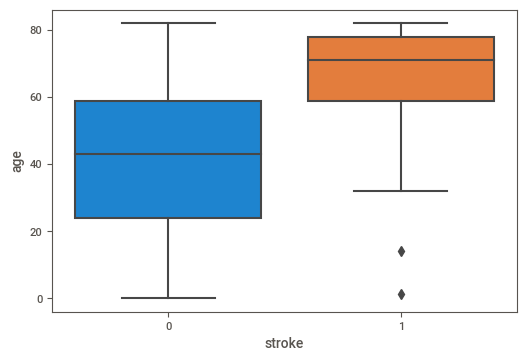

In [41]:
sns.boxplot(x="stroke", y="age", data=df_strokes)

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

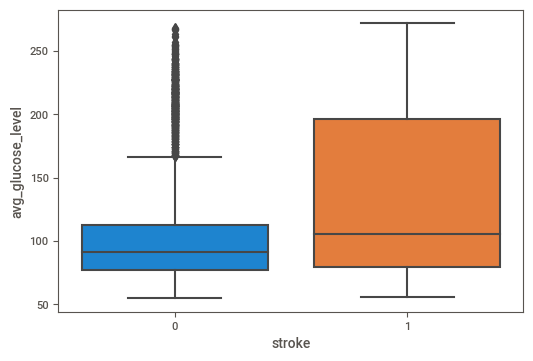

In [42]:
sns.boxplot(x="stroke", y="avg_glucose_level", data=df_strokes)

En la relacion bmi-stroke no vemos tanto aporte de información. Las curvas se superponen.


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

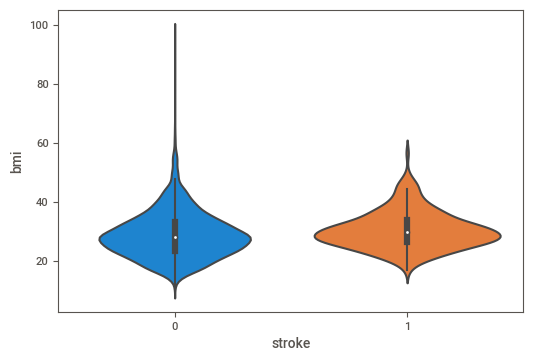

In [43]:
sns.violinplot(x="stroke", y="bmi", data=df_original)

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

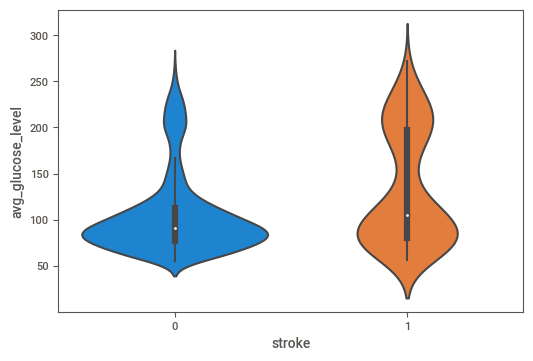

In [44]:
sns.violinplot(x="stroke", y="avg_glucose_level", data=df_original)


## Conclusiones correlacion y seleccion de atributos

d) Se necesita saber cuáles son los indicadores que determinan más susceptibilidad a sufrir una lesión. ¿Qué atributos utilizará como variables predictoras? ¿Por qué?  


Edad, heart_disease, hypertension parecen ser las que mejor correlacionan


## Balanceo

----
e) ¿Se encuentra balanceado el conjunto de datos que utilizará para desarrollar el algoritmo diseñado para contestar el punto d)? En base a lo respondido, ¿qué métricas de performance reportaría y por qué? En caso de estar desbalanceado, ¿qué estrategia de balanceo utilizaría?  


In [45]:
df_strokes.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [46]:
df_strokes.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

No, el dataset no se encuentra balanceado.  

**TBD:** 

Estrategias a utilizar para enfrentar el desbalanceo

* Balanceo a mano?
* Metodos de sampling y under sampling
* Usar la feature del método de Sklearn que balancea el data set


## Medidas de performance

-----
f) Suponiendo que es más importante detectar los casos en donde el evento ocurre. ¿Qué medida de performance utilizaría? Si utiliza Fβ-Score, ¿qué valor de β eligiría?  

***


### Medidas de performance

* Precision/Presition: De las instancias clasificadas como positivas, cuántas lo son (cuán útiles son los resultados de búsqueda)
* RecalL: de las instancias positivas, cuántas fueron
clasificadas como positivas (cuán completos son los resultados)

Creemos que recall es más importante, al ser un tema médico es importante cuidar la completitud de los resultados. Si alguien tiene posibilidad de tener un infarto, detectarlo y poder decir que se cuide.

### F-beta.

Usaríamos F1 y F2

F1 por una cuestión de generalidad, la mayoría de los métodos y librerías vienen por defecto con métricas del estilo F1, también nos parece interesante usar F2 (Porque da más peso al Recall que sería lo que queremos priorizar)


## Primer arbol

In [47]:
df_strokes.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_inputation_mean', 'bmi_inputation_knn',
       'bmi_inputation_work_type', 'ever_married_cat', 'residence_type_cat',
       'gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly_smoked',
       'smoking_status_never_smoked', 'smoking_status_smokes'],
      dtype='object')

### Drop de columnas categoricas


In [48]:
#Con sklearn podemos dividir nuestros datos en conjuntos de entrenamiento, validación y prueba.
from sklearn import tree
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

data=df_strokes.copy(deep=True)
data=data.drop(labels=['stroke', 'gender', 'work_type', 'Residence_type', 'ever_married', 'smoking_status', 'bmi_inputation_mean', 'bmi', 'bmi_inputation_work_type', 'id'], axis=1)
target = df_strokes['stroke']

data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi_inputation_knn', 'ever_married_cat', 'residence_type_cat',
       'gender_Female', 'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly_smoked',
       'smoking_status_never_smoked', 'smoking_status_smokes'],
      dtype='object')

g) Implementar el algoritmo introducido en el punto d) utilizando árboles de decisión. En primer lugar, se deberá separar un 20% de los datos para usarlos como conjunto de evaluación (test set). El conjunto restante (80%) es el de desarrollo y es con el que se deberá continuar haciendo el trabajo. Realizar los siguientes puntos:
1) Armar conjuntos de entrenamiento y validación con proporción 80-20 del conjunto de desarrollo de forma aleatoria. Usar 50 semillas distintas y realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en c) en esas 50 particiones distintas.
2) Usar validación cruzada de 50 iteraciones (50-fold cross validation). Realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en esas 50 particiones distintas.
***


### Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

### Train sin balanceo

In [50]:

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
arbol_sklearn = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1, ccp_alpha=0)
# Train acc: 0.9577858540676545
# Test acc: 0.9399869536855838
arbol_sklearn.fit(X_train,y_train)
y_pred_test = arbol_sklearn.predict(X_test)
y_pred_train = arbol_sklearn.predict(X_train)

print('Train acc: {}'.format(accuracy_score(y_train,y_pred_train)))
print('Test acc: {}'.format(accuracy_score(y_test,y_pred_test)))
print('F1: {}'.format(fbeta_score(y_test,y_pred_test, beta=1)))
print('F2: {}'.format(fbeta_score(y_test,y_pred_test, beta=2)))
print(classification_report(y_test, y_pred_test))

# TBD: Agregar precition, reall, F-beta-score

predictions=arbol_sklearn.predict(X_test)

Train acc: 0.9549902152641878
Test acc: 0.9393346379647749
F1: 0.0
F2: 0.0
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/home/RebaUser/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/RebaUser/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/RebaUser/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Train con balanceo

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
arbol_sklearn = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1, ccp_alpha=0, class_weight="balanced" )
# Train acc: 0.7978753145093654
# Test acc: 0.7932159165035877
arbol_sklearn.fit(X_train,y_train)
y_pred_test = arbol_sklearn.predict(X_test)
y_pred_train = arbol_sklearn.predict(X_train)

print('Train acc: {}'.format(accuracy_score(y_train,y_pred_train)))
print('Test acc: {}'.format(accuracy_score(y_test,y_pred_test)))
print('F1: {}'.format(fbeta_score(y_test,y_pred_test, beta=1)))
print('F2: {}'.format(fbeta_score(y_test,y_pred_test, beta=2)))
print(classification_report(y_test, y_pred_test))

predictions=arbol_sklearn.predict(X_test)

Train acc: 0.7725048923679061
Test acc: 0.7778864970645792
F1: 0.26058631921824105
F2: 0.4056795131845842
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       960
           1       0.16      0.65      0.26        62

    accuracy                           0.78      1022
   macro avg       0.57      0.72      0.56      1022
weighted avg       0.92      0.78      0.83      1022



### Feature importance

In [52]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data.columns,
                             'importancia': arbol_sklearn.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,7.447478e-01
3,avg_glucose_level,1.495071e-01
4,bmi_inputation_knn,5.419094e-02
14,work_type_children,1.991170e-02
10,work_type_Govt_job,1.431004e-02
2,heart_disease,1.066736e-02
12,work_type_Private,6.665022e-03
8,gender_Male,1.811462e-16
17,smoking_status_never_smoked,0.000000e+00
16,smoking_status_formerly_smoked,0.000000e+00


## Varias semillas

 1) Armar conjuntos de entrenamiento y validación con proporción 80-20 del conjunto de desarrollo de forma aleatoria. Usar 50 semillas distintas y realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en c) en esas 50 particiones distintas. 

In [53]:
output_f1 = []
output_f2 = []
for i in range(50):
  X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=i)
  arbol_sklearn = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1, ccp_alpha=0, class_weight="balanced" )
  arbol_sklearn.fit(X_train,y_train)
  y_pred_test = arbol_sklearn.predict(X_test)
  y_pred_train = arbol_sklearn.predict(X_train)

  output_f1.append(fbeta_score(y_test,y_pred_test, beta=1))
  output_f2.append(fbeta_score(y_test,y_pred_test, beta=2))

  # TBD: Poner las 4 metricas juntas


<AxesSubplot:>

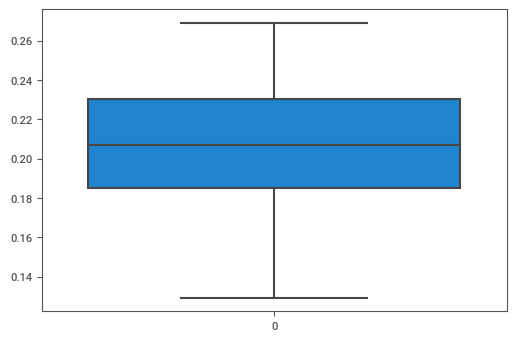

In [54]:
sns.boxplot(data=output_f1)

<AxesSubplot:>

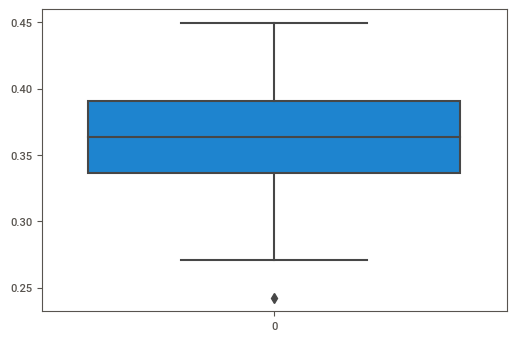

In [55]:
sns.boxplot(data=output_f2)

## Kfolds

2) Usar validación cruzada de 50 iteraciones (50-fold cross validation). Realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en esas 50 particiones distintas.

In [56]:
from sklearn.model_selection import cross_val_score
# clf = tree.DecisionTreeClassifier(max_depth=i)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1, ccp_alpha=0, class_weight="balanced" )
# Perform 7-fold cross validation 
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=50, n_jobs=4)

### Algunas métricas

Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [57]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.06


<AxesSubplot:>

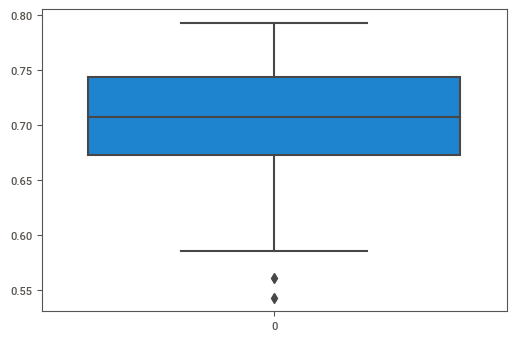

In [58]:
sns.boxplot(data=scores)

0.50 accuracy with a standard deviation of 0.05


<AxesSubplot:>

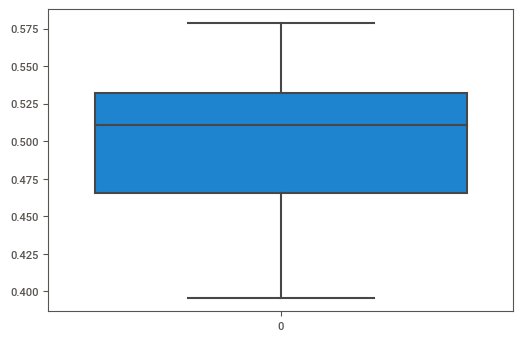

In [59]:
# F1-score
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=50, n_jobs=4, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
sns.boxplot(data=scores)

0.11 accuracy with a standard deviation of 0.04


<AxesSubplot:>

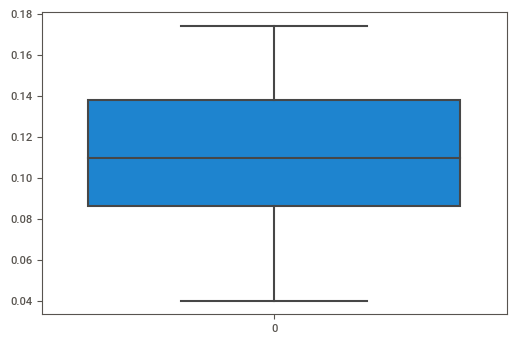

In [60]:
# precision
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=50, n_jobs=4, scoring='precision')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
sns.boxplot(data=scores)

0.78 accuracy with a standard deviation of 0.23


<AxesSubplot:>

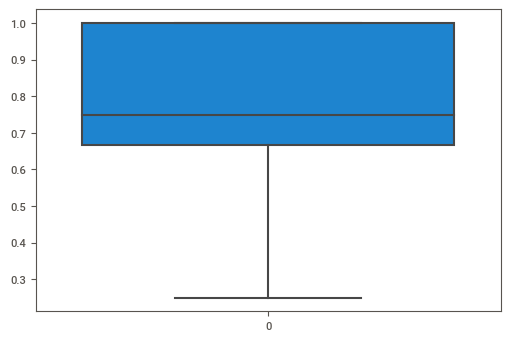

In [61]:
#recall
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=50, n_jobs=4, scoring='recall')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
sns.boxplot(data=scores)

0.80 accuracy with a standard deviation of 0.12


<AxesSubplot:>

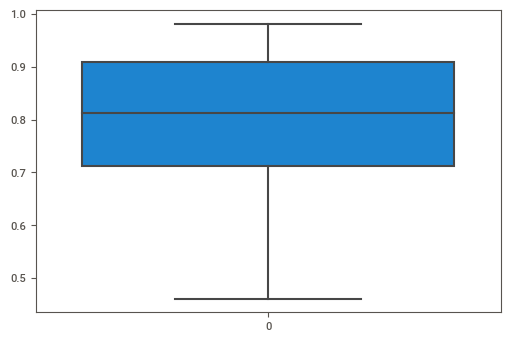

In [62]:
#roc_auc
scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=50, n_jobs=4, scoring='roc_auc')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
sns.boxplot(data=scores)

## Búsqueda de parámetros

X_train, X_test, y_train, y_test 

## Setup mlflow

In [82]:
import mlflow
import mlflow.sklearn
from urllib.parse import urlparse
from mlflow.tracking import MlflowClient
import datetime

now = datetime.datetime.now()

In [83]:
mlflow.set_tracking_uri("http://mlflow_server:5000")
tracking_uri = mlflow.get_tracking_uri()
print("Current tracking uri: {}".format(tracking_uri))

Current tracking uri: http://mlflow_server:5000


In [87]:
import mlflow
import mlflow.sklearn
from urllib.parse import urlparse
from mlflow.tracking import MlflowClient

mlflow.set_tracking_uri("http://mlflow_server:5000")
tracking_uri = mlflow.get_tracking_uri()
print("Current tracking uri: {}".format(tracking_uri))

# client = MlflowClient()
# Con una vez estamos

Current tracking uri: http://mlflow_server:5000


In [88]:
# No hace falta el create, el set lo crea si no existe
# experiment_id = mlflow.create_experiment("TP 1 - AA")
experiment = mlflow.set_experiment("AA.TP1.RandomizedSearchCV.{0}".format(now.strftime("%Y-%m-%d")) )
# Poner la fecha como carpeta de ejecución

INFO: 'AA.TP1.RandomizedSearchCV.2021-05-20' does not exist. Creating a new experiment


### Cantidad parametros

In [89]:
# 2 ^ n < Cant de datos
import math
math.log2(5000)

12.287712379549449

In [90]:
# Cantidad combinaciones
print(2*12*200*4)

19200


### Grid search

In [91]:
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np

In [104]:

# TBD: Están bien esos criterios? O mejor ampliar?
# Ref de criterios -> https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
params_grid = {'criterion':['gini','entropy'],
               'max_depth':list(range(1,12)),
               'ccp_alpha':np.linspace(0,0.5,200),
               'min_samples_leaf': list(range(5,10)),
               # cuantas muestras en nodo para poder hacer el split -> https://youtu.be/XABw4Y3GBR4?t=260 
               # 'min_samples_split': list(range(2,6)) 
               }

kfoldcv = StratifiedKFold(n_splits=50)
base_tree = DecisionTreeClassifier(class_weight="balanced")
# scorer_fn = make_scorer(f1_score)
scorer_f2 = make_scorer(fbeta_score, beta=2)
randomcv = RandomizedSearchCV(estimator=base_tree,param_distributions = params_grid,scoring=scorer_f2,cv=kfoldcv,n_iter=1000)
# randomcv = GridSearchCV(estimator=base_tree, param_grid=params_grid, scoring=scorer_f2, cv=kfoldcv)
randomcv.fit(X_train,y_train);

# TBD: Busqueda bayesiana, que use gradiente ( Algo que habían compartido Joaquin y Lucas )

In [105]:
pd.DataFrame(randomcv.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,param_ccp_alpha,params,split0_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011005,0.000856,0.003289,0.000530,5,5,entropy,0.462312,"{'min_samples_leaf': 5, 'max_depth': 5, 'crite...",0.159574,...,0.161290,0.161290,0.16129,0.161290,0.161290,0.161290,0.161290,0.041901,0.070690,407
1,0.014106,0.000886,0.003166,0.000451,7,10,entropy,0.173367,"{'min_samples_leaf': 7, 'max_depth': 10, 'crit...",0.250000,...,0.272727,0.277778,0.30000,0.243902,0.272727,0.258621,0.217391,0.308257,0.049408,164
2,0.008010,0.000444,0.003263,0.000541,8,3,gini,0.389447,"{'min_samples_leaf': 8, 'max_depth': 3, 'crite...",0.159574,...,0.161290,0.161290,0.16129,0.161290,0.161290,0.161290,0.161290,0.041901,0.070690,407
3,0.011633,0.000699,0.003186,0.000386,9,11,gini,0.336683,"{'min_samples_leaf': 9, 'max_depth': 11, 'crit...",0.159574,...,0.161290,0.161290,0.16129,0.161290,0.161290,0.161290,0.161290,0.041901,0.070690,407
4,0.009638,0.001022,0.003250,0.000803,6,5,gini,0.429648,"{'min_samples_leaf': 6, 'max_depth': 5, 'crite...",0.159574,...,0.161290,0.161290,0.16129,0.161290,0.161290,0.161290,0.161290,0.041901,0.070690,407


In [106]:
aux = pd.DataFrame(randomcv.cv_results_)
params = [x for x in aux.columns if 'param_' in x]
print(params)
score = [x for x in aux.columns if 'score' in x]
print(score)
time = [x for x in aux.columns if 'time' in x]
print(time)

['param_min_samples_leaf', 'param_max_depth', 'param_criterion', 'param_ccp_alpha']
['mean_score_time', 'std_score_time', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'split10_test_score', 'split11_test_score', 'split12_test_score', 'split13_test_score', 'split14_test_score', 'split15_test_score', 'split16_test_score', 'split17_test_score', 'split18_test_score', 'split19_test_score', 'split20_test_score', 'split21_test_score', 'split22_test_score', 'split23_test_score', 'split24_test_score', 'split25_test_score', 'split26_test_score', 'split27_test_score', 'split28_test_score', 'split29_test_score', 'split30_test_score', 'split31_test_score', 'split32_test_score', 'split33_test_score', 'split34_test_score', 'split35_test_score', 'split36_test_score', 'split37_test_score', 'split38_test_score', 'split39_test_score', 'split40

In [107]:
for index, row in aux.iterrows():
    with mlflow.start_run(experiment):
        mlflow.log_param('Busqueda', 'RandomizedSearchCV')
        for i in params:
            # rint('param: {0}, valor: {1}'.format(i, row[i]))
            mlflow.log_param(i, row[i])
        
        for i in score:
            # rint('param: {0}, valor: {1}'.format(i, row[i]))
            mlflow.log_metric(i, row[i])
        
        for i in time:
            # rint('param: {0}, valor: {1}'.format(i, row[i]))
            mlflow.log_metric(i, row[i])

In [108]:
randomcv.best_params_

{'min_samples_leaf': 7,
 'max_depth': 5,
 'criterion': 'gini',
 'ccp_alpha': 0.007537688442211055}

In [109]:
best_model = randomcv.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.71      0.83       960
           1       0.15      0.81      0.26        62

    accuracy                           0.72      1022
   macro avg       0.57      0.76      0.54      1022
weighted avg       0.93      0.72      0.79      1022



In [110]:
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_
feat_imps

array([0.9576013, 0.       , 0.       , 0.0423987, 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       ])

(Faltan traer cosas y ordenarlo)

/home/RebaUser/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/RebaUser/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


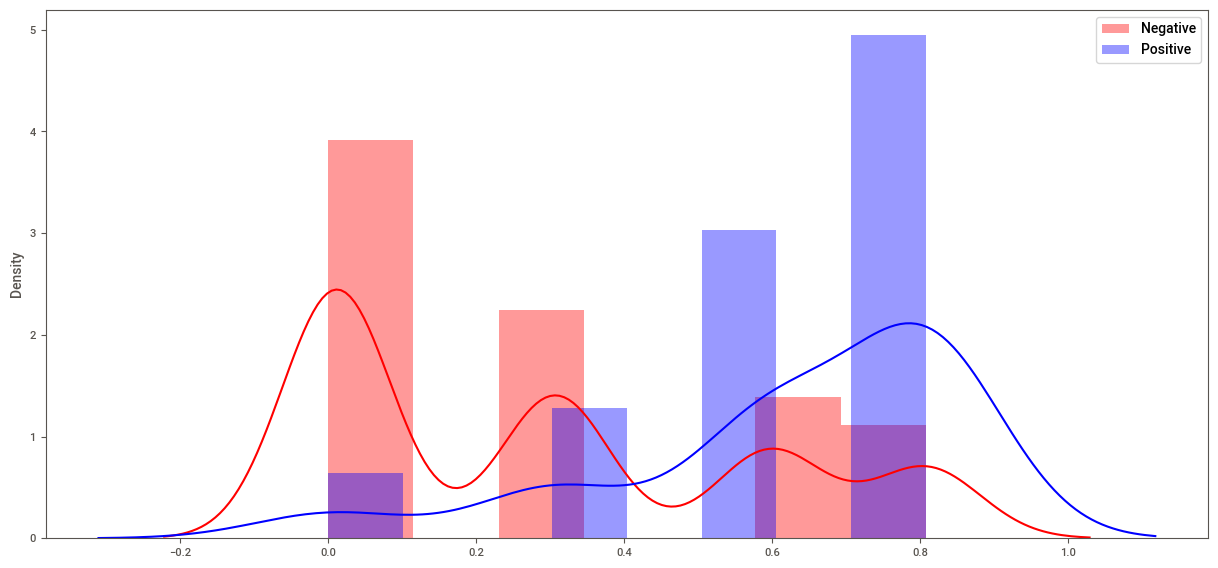

In [111]:
y_scores = best_model.predict_proba(X_test)
out_probs = y_scores[:,1]

plt.figure(figsize=(15,7))
sns.distplot(out_probs[y_test==0],color='r',label='Negative')
sns.distplot(out_probs[y_test==1],color='b',label='Positive')
plt.legend()

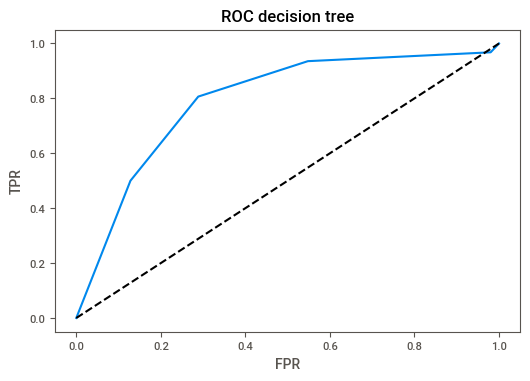

In [112]:
from sklearn.metrics import roc_curve

fpr,tpr,th = roc_curve(y_test,out_probs)

plt.title('ROC decision tree')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr,fpr,'--k')

**TBD:** Que hacemos? Esperamos la clase?


## Graficar el arbol de decisión con mejor performance

Nosotros deberíamos hacer algun tipo de búsqueda de hiperparámetros (Por ej: grid-search). Asi vamos a tener distintas configuraciones de árboles.

Usamos despues k-fold para testear con más precisión. Porque? Porque asi evitamos que una particion random nos condicione el resultado. Promediamos valores y estamos más seguros de que el resultado es una prueba de k folds. 

Despues graficamos el que mejor quedó. 

(Por lo menos eso entendí)

h) Graficar el árbol de decisión con mejor performance encontrado en el punto g2). Analizar el árbol de decisión armado (atributos elegidos y decisiones evaluadas).
***

**TBD**: VEr que las columnas están con indices, hace inentendible.


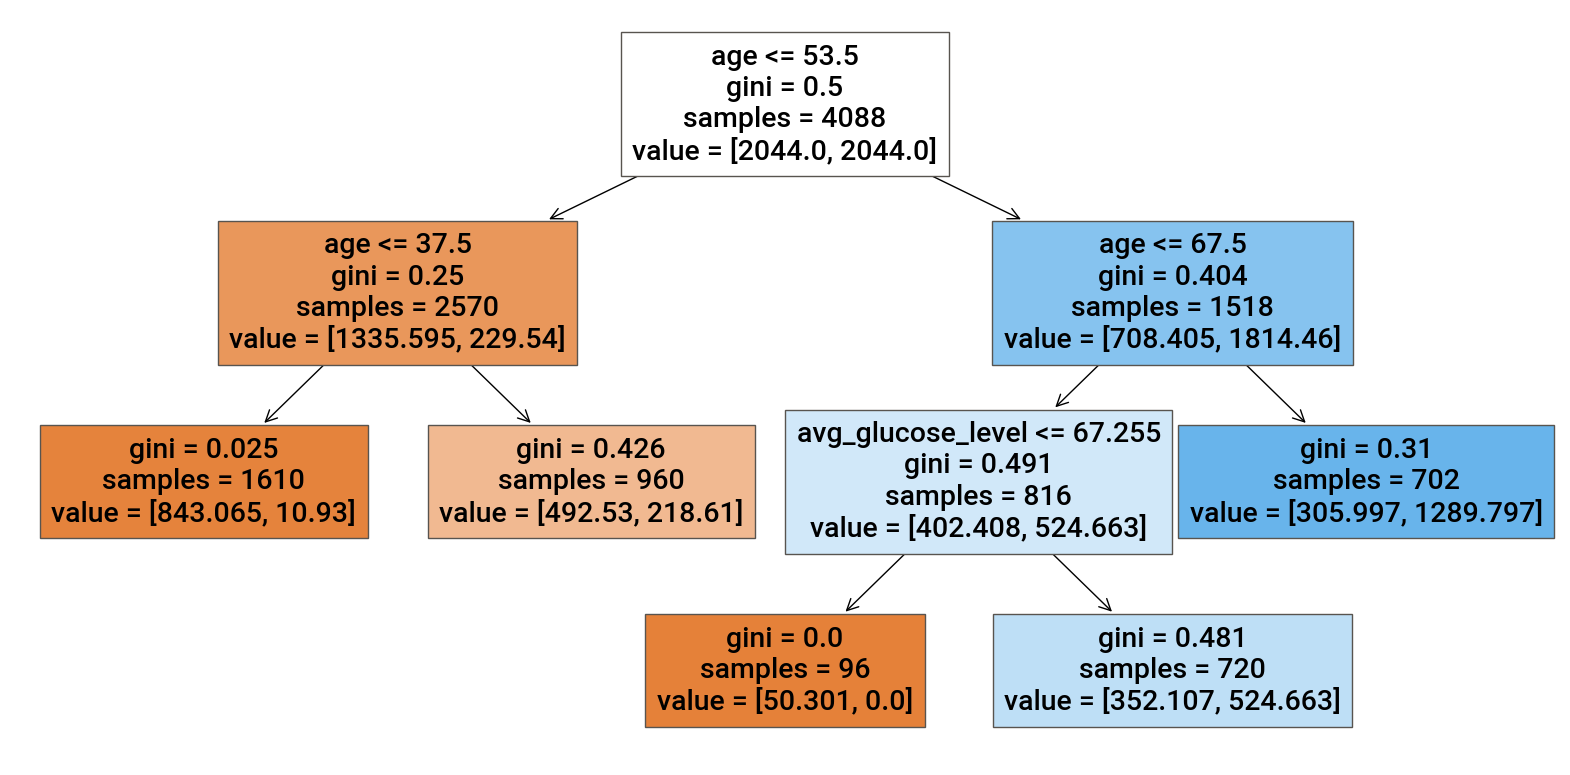

In [113]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
# _ = tree.plot_tree(arbol_sklearn,
#                    filled=True)
featnames = data.columns
plot_tree(best_model,feature_names=featnames,filled=True,proportion=False);

# TBD: Que es value?

In [118]:
from sklearn import tree

text_representation = tree.export_text(best_model)
print(text_representation)

# Más info para visualizaciones: https://mljar.com/blog/visualize-decision-tree/

|--- feature_0 <= 53.50
|   |--- feature_0 <= 37.50
|   |   |--- class: 0
|   |--- feature_0 >  37.50
|   |   |--- class: 0
|--- feature_0 >  53.50
|   |--- feature_0 <= 67.50
|   |   |--- feature_3 <= 67.26
|   |   |   |--- class: 0
|   |   |--- feature_3 >  67.26
|   |   |   |--- class: 1
|   |--- feature_0 >  67.50
|   |   |--- class: 1



In [114]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data.columns,
                             'importancia': best_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,age,0.957601
3,avg_glucose_level,0.042399
10,work_type_Govt_job,0.000000
17,smoking_status_never_smoked,0.000000
16,smoking_status_formerly_smoked,0.000000
15,smoking_status_Unknown,0.000000
14,work_type_children,0.000000
13,work_type_Self-employed,0.000000
12,work_type_Private,0.000000
11,work_type_Never_worked,0.000000


## Distintos alfas

Con 10-folds cross validation

i) Usando validación cruzada de 10 iteraciones (10-fold cross validation), probar distintos valores de α del algoritmo de poda mínima de complejidad de costos (algoritmo de poda de sklearn). Hacer gráficos de la performance en validación y entrenamiento en función del α. Explicar cómo varía la profundidad de los árboles al realizar la poda con distintos valores de α.

**ref**: https://scikit-learn.org/dev/auto_examples/tree/plot_cost_complexity_pruning.html


j) Evaluar en el conjunto de evaluación, el árbol correspondiente al α que maximice la performance en el conjunto de validación. Comparar con el caso sin poda (α=0)
***


## Descriptores

k) Para el árbol sin poda, obtener la importancia de los descriptores usando la técnica de eliminación recursiva. Reentrenar el árbol usando sólo los 3 descriptores más importantes. Comparar la performance en el conjunto de prueba.
Atención: los puntos anteriores no necesariamente deben ser respondidos en el mismo orden en el que son formulados. El único requisito es que sus respuestas estén en alguna parte del informe entregado.

**ref**: https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784

_Recursive Feature Elimination (RFE)_ takes as input the instance of a Machine Learning model and the final desired number of features to use. It then recursively reduces the number of features to use by ranking them using the Machine Learning model accuracy as metrics.

In [115]:
from sklearn.feature_selection import RFE
import time

rfe = RFE(best_model, 3)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_train,y_train)
RFE_X_Test = rfe.transform(X_test)
rfe = rfe.fit(RFE_X_Train,y_train)
print(time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,y_test))

0.12356864200000928
Overall Accuracy using RFE:  0.7172211350293543


/home/RebaUser/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
